<a href="https://colab.research.google.com/github/ththtec/projeto02-sql/blob/main/Notebook_de_An%C3%A1lise_de_Vendas_no_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Análise de Vendas com SQL e Python

Este notebook realiza uma análise completa sobre uma base de dados de vendas. Usaremos SQL para as consultas e Python (com as bibliotecas Pandas, Matplotlib e Seaborn) para a manipulação e visualização dos dados.

# Passo 1: Configuração do Ambiente

In [108]:
# Importando as bibliotecas necessárias
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install squarify

# Configurações de visualização para os gráficos e tabelas
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Criar uma conexão com um banco de dados SQLite em memória
# O banco de dados existirá apenas enquanto o notebook estiver em execução
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

print(" Ambiente configurado e conexão com o banco de dados estabelecida.")

 Ambiente configurado e conexão com o banco de dados estabelecida.


#Passo 2: Criação da Estrutura das Tabelas (Schema)

Agora, vamos definir a estrutura (schema) do nosso banco de dados. Criaremos três tabelas: Clientes e Produtos (tabelas de dimensão) e Vendas (tabela de fatos). Usaremos o comando CREATE TABLE.

In [77]:
# Script para criação das tabelas
script_criacao_tabelas = """
-- Tabela de Clientes
CREATE TABLE Clientes (
    id_cliente      INTEGER PRIMARY KEY,
    nome_cliente    TEXT,
    email_cliente   TEXT,
    estado_cliente  TEXT
);

-- Tabela de Produtos
CREATE TABLE Produtos (
    id_produto          INTEGER PRIMARY KEY,
    nome_produto        TEXT,
    categoria_produto   TEXT,
    preco_produto       REAL
);

-- Tabela de Vendas
CREATE TABLE Vendas (
    id_venda        INTEGER PRIMARY KEY,
    id_cliente      INTEGER,
    id_produto      INTEGER,
    data_venda      DATE,
    quantidade      INTEGER,
    FOREIGN KEY (id_cliente) REFERENCES Clientes(id_cliente),
    FOREIGN KEY (id_produto) REFERENCES Produtos(id_produto)
);
"""

# Executando o script de criação
cursor.executescript(script_criacao_tabelas)
conn.commit()

print("Tabelas Clientes, Produtos e Vendas criadas com sucesso.")


Tabelas Clientes, Produtos e Vendas criadas com sucesso.


# Passo 3: Inserção dos Dados nas Tabelas

Com as tabelas criadas, o próximo passo é populá-las com os dados. Usaremos o comando INSERT INTO para adicionar os registros de clientes, produtos e todas as vendas.

In [78]:
# Script para inserção de todos os dados
script_insercao_dados = """
INSERT INTO Clientes (id_cliente, nome_cliente, email_cliente, estado_cliente) VALUES
    (1, 'Ana Silva', 'ana.s@email.com', 'SP'), (2, 'Bruno Costa', 'b.costa@email.com', 'RJ'),
    (3, 'Carla Dias', 'carla.d@email.com', 'SP'), (4, 'Daniel Souza', 'daniel.s@email.com', 'MG'),
    (5, 'Lucas Martins', 'lucas.m@email.com', 'BA'), (6, 'Fernanda Rocha', 'fernanda.r@email.com', 'SP'),
    (7, 'João Lima', 'joao.l@email.com', 'RJ'), (8, 'Aline Souza', 'aline.s@email.com', 'MG'),
    (9, 'Eduarda Martins', 'eduarda.m@email.com', 'BA'), (10, 'Felipe Rocha', 'felipe.r@email.com', 'RS'),
    (11, 'Gabriela Lima', 'gabriela.l@email.com', 'PR'), (12, 'Henrique Alves', 'henrique.a@email.com', 'PE'),
    (13, 'Diego Santos', 'diego.s@email.com', 'GO'), (14, 'Larissa Ferreira', 'larissa.f@email.com', 'PA'),
    (15, 'André Nascimento', 'andre.n@email.com', 'AM'), (16, 'Patrícia Mendes', 'patricia.m@email.com', 'SC'),
    (17, 'Fernanda Lima', 'f.lima@email.com', 'PR'), (18, 'Gustavo Mendes', 'g.mendes@email.com', 'BA'),
    (19, 'Helena Costa', 'h.costa@email.com', 'MG'), (20, 'Isabel Moraes', 'i.moraes@email.com', 'SP'),
    (21, 'Eduardo Reis', 'edu.reis@email.com', 'SP'), (22, 'Fernanda Lima', 'fernanda.l@email.com', 'PR'),
    (23, 'Gustavo Nogueira', 'gustavo.n@email.com', 'RS'), (24, 'Helena Martins', 'helena.m@email.com', 'SC');

INSERT INTO Produtos (id_produto, nome_produto, categoria_produto, preco_produto) VALUES
    (101, 'Fundamentos de SQL', 'Dados', 60.00), (102, 'Duna', 'Ficção Científica', 80.50),
    (103, 'Python para Dados', 'Programação', 75.00), (104, 'O Guia do Mochileiro', 'Ficção Científica', 42.00),
    (105, 'SQL Avançado', 'Dados', 85.00), (106, 'Inteligência Artificial', 'Programação', 120.00),
    (107, 'O Hobbit', 'Ficção Científica', 70.00), (108, 'Machine Learning com Python', 'Programação', 110.00),
    (109, 'Machine Learning Essencial', 'Dados', 95.00), (110, 'Neuromancer', 'Ficção Científica', 70.00),
    (111, 'Java para Iniciantes', 'Programação', 65.50), (112, 'Senhor dos Anéis', 'Fantasia', 120.00),
    (113, 'Introdução ao Cloud Computing', 'Infraestrutura', 130.00), (114, 'Python para Ciência de Dados', 'Programação', 95.00),
    (115, 'Fundamentos de Cibersegurança', 'Segurança', 140.00), (116, 'Banco de Dados NoSQL', 'Dados', 110.00),
    (117, 'O Senhor dos Anéis', 'Dados', 95.00), (118, 'Introdução ao Machine Learning', 'Programação', 110.00),
    (119, 'Data Visualization', 'Dados', 88.00), (120, 'A Revolução dos Bichos', 'Ficção Científica', 55.00),
    (121, 'Python para Iniciantes', 'Programação', 95.00), (122, 'Gestão de Projetos', 'Administração', 130.00),
    (123, 'Senhor dos Anéis', 'Ficção Científica', 80.00), (124, 'Estatística Aplicada', 'Dados', 100.00);

INSERT INTO Vendas (id_venda, id_cliente, id_produto, data_venda, quantidade) VALUES
    (1, 1, 101, '2024-01-15', 1), (2, 2, 102, '2024-01-18', 1), (3, 3, 103, '2024-02-02', 2),
    (4, 1, 102, '2024-02-10', 1), (5, 4, 101, '2024-02-20', 1), (6, 2, 104, '2024-03-05', 1),
    (7, 5, 105, '2024-03-10', 1), (8, 6, 106, '2024-03-12', 1), (9, 7, 107, '2024-03-15', 2),
    (10, 5, 107, '2024-03-20', 1), (11, 8, 105, '2024-03-22', 1), (12, 6, 108, '2024-03-25', 1),
    (13, 9, 109, '2024-03-12', 1), (14, 10, 110, '2024-03-15', 1), (15, 11, 111, '2024-03-18', 2),
    (16, 12, 112, '2024-03-20', 1), (17, 13, 113, '2024-04-15', 1), (18, 14, 114, '2024-04-18', 2),
    (19, 15, 115, '2024-04-20', 1), (20, 16, 116, '2024-04-22', 1), (21, 1, 117, '2024-03-10', 1),
    (22, 2, 118, '2024-03-15', 1), (23, 3, 119, '2024-03-22', 2), (24, 1, 120, '2024-03-28', 1),
    (25, 21, 108, '2024-03-28', 2), (26, 9, 106, '2024-04-02', 1), (27, 10, 105, '2024-04-05', 1),
    (28, 9, 108, '2024-04-10', 1), (29, 23, 106, '2024-04-12', 1);
"""

# Executando o script de inserção
cursor.executescript(script_insercao_dados)
conn.commit()

print(" Dados inseridos com sucesso em todas as tabelas.")

 Dados inseridos com sucesso em todas as tabelas.


# Passo 4: Análise de Dados - Respondendo Perguntas de Negócio

 Vamos executar consultas SQL scripitadas no projeto. Para facilitar a manipulação dos resultados, criaremos uma função auxiliar (executar_query) que já retorna os dados como um DataFrame do Pandas.

In [79]:
# Função auxiliar para executar queries e retornar DataFrames
def executar_query(query):
    """Executa uma query SQL e retorna o resultado como um DataFrame do Pandas."""
    return pd.read_sql_query(query, conn)

print("Função 'executar_query' criada.")

Função 'executar_query' criada.


## Pergunta 1: Qual o nome dos clientes que moram no estado de 'SP'?

In [6]:
query1 = "SELECT nome_cliente, email_cliente FROM Clientes WHERE estado_cliente = 'SP';"
df_clientes_sp = executar_query(query1)
print("--- Clientes de São Paulo (SP) ---")
display(df_clientes_sp)

--- Clientes de São Paulo (SP) ---


,nome_cliente,email_cliente
0,Ana Silva,ana.s@email.com
1,Carla Dias,carla.d@email.com
2,Fernanda Rocha,fernanda.r@email.com
3,Isabel Moraes,i.moraes@email.com
4,Eduardo Reis,edu.reis@email.com


## Pergunta 2: Quais produtos pertencem à categoria 'Ficção Científica'?

In [7]:
query2 = "SELECT nome_produto, preco_produto FROM Produtos WHERE categoria_produto = 'Ficção Científica';"
df_ficcao = executar_query(query2)
print("\n--- Produtos de Ficção Científica ---")
display(df_ficcao)



--- Produtos de Ficção Científica ---


,nome_produto,preco_produto
0,Duna,80.5
1,O Guia do Mochileiro,42.0
2,O Hobbit,70.0
3,Neuromancer,70.0
4,A Revolução dos Bichos,55.0
5,Senhor dos Anéis,80.0


## Pergunta 3: Qual o produto mais vendido em termos de quantidade?

In [8]:
query3 = """
SELECT
    p.nome_produto,
    SUM(v.quantidade) AS total_quantidade_vendida
FROM
    Vendas AS v
JOIN
    Produtos AS p ON v.id_produto = p.id_produto
GROUP BY
    p.nome_produto
ORDER BY
    total_quantidade_vendida DESC;
"""
df_mais_vendidos = executar_query(query3)
print("\n--- Ranking de Produtos Mais Vendidos ---")
display(df_mais_vendidos)


--- Ranking de Produtos Mais Vendidos ---


,nome_produto,total_quantidade_vendida
0,Machine Learning com Python,4
1,SQL Avançado,3
2,O Hobbit,3
3,Inteligência Artificial,3
4,Python para Dados,2
5,Python para Ciência de Dados,2
6,Java para Iniciantes,2
7,Fundamentos de SQL,2
8,Duna,2
9,Data Visualization,2


# Passo 5: Visualização de Dados

Agora, vamos usar gráficos para visualizar os dados e facilitar a extração de insights.

## Gráfico 1: Distribuição de Clientes por Estado

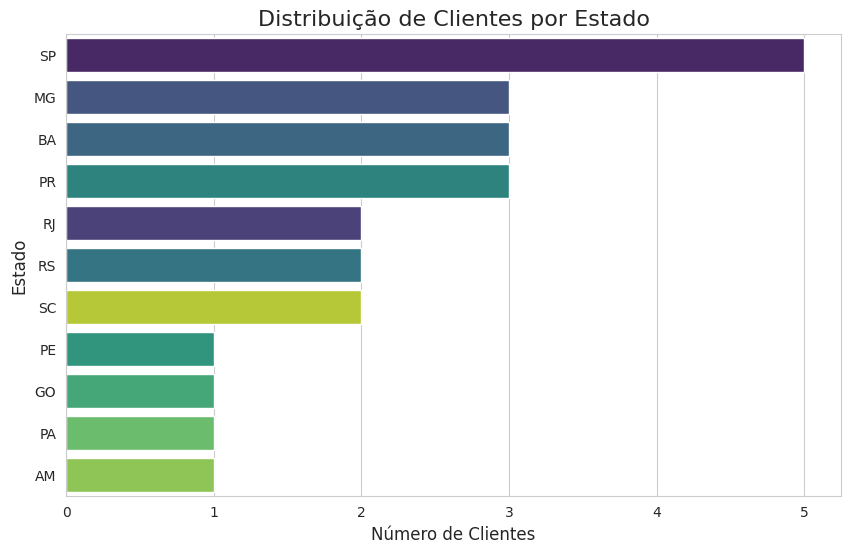

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_clientes,
    y='estado_cliente',
    hue='estado_cliente',
    order=df_clientes['estado_cliente'].value_counts().index,
    palette='viridis',
    legend=False
)
plt.title('Distribuição de Clientes por Estado', fontsize=16)
plt.xlabel('Número de Clientes', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.show()


## Gráfico 2: Faturamento Total por Categoria de Produto

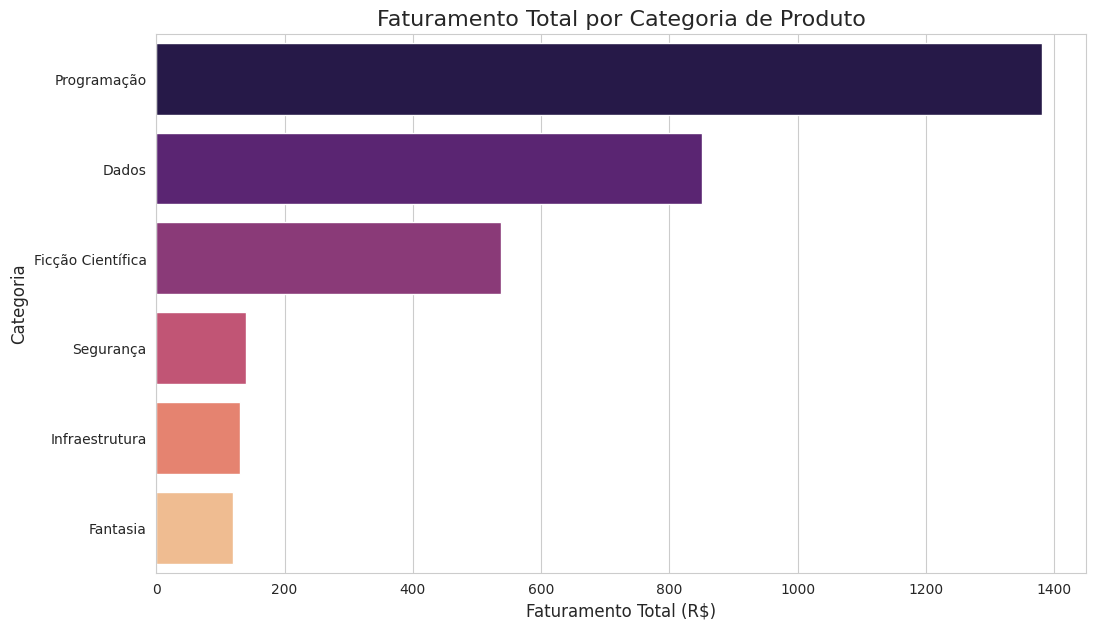

In [11]:
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_faturamento_categoria,
    x='faturamento_total',
    y='categoria_produto',
    hue='categoria_produto',
    palette='magma',
    legend=False
)
plt.title('Faturamento Total por Categoria de Produto', fontsize=16)
plt.xlabel('Faturamento Total (R$)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.show()


## Gráfico 3: Volume de Vendas ao Longo do Tempo

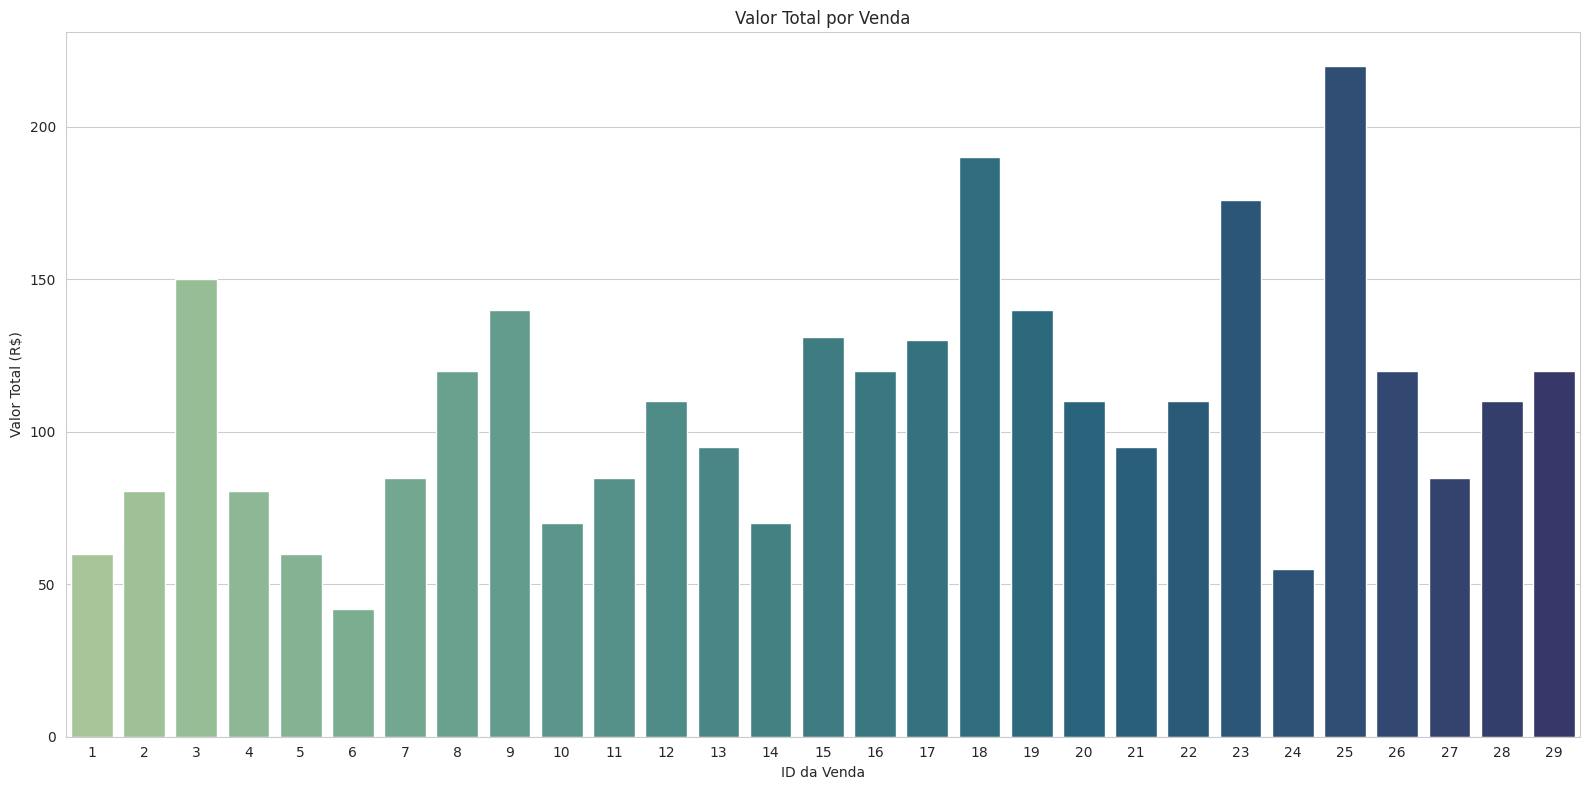

In [44]:
# Gráfico de distribuição de vendas por cliente
df_valor_venda = executar_query(query4)


plt.figure(figsize=(16, 8))
sns.barplot(
    data=df_valor_venda,
    x='id_venda',
    y='valor_total',
    hue='id_venda',
    palette='crest',
    legend=False
)
plt.title('Valor Total por Venda')
plt.xlabel('ID da Venda')
plt.ylabel('Valor Total (R$)')
plt.xticks(rotation=0) #define a legenda na rotação 0 para facilitar a leitura.
plt.tight_layout()
plt.show()


##  Gráfico 4: Produtos mais vendidos

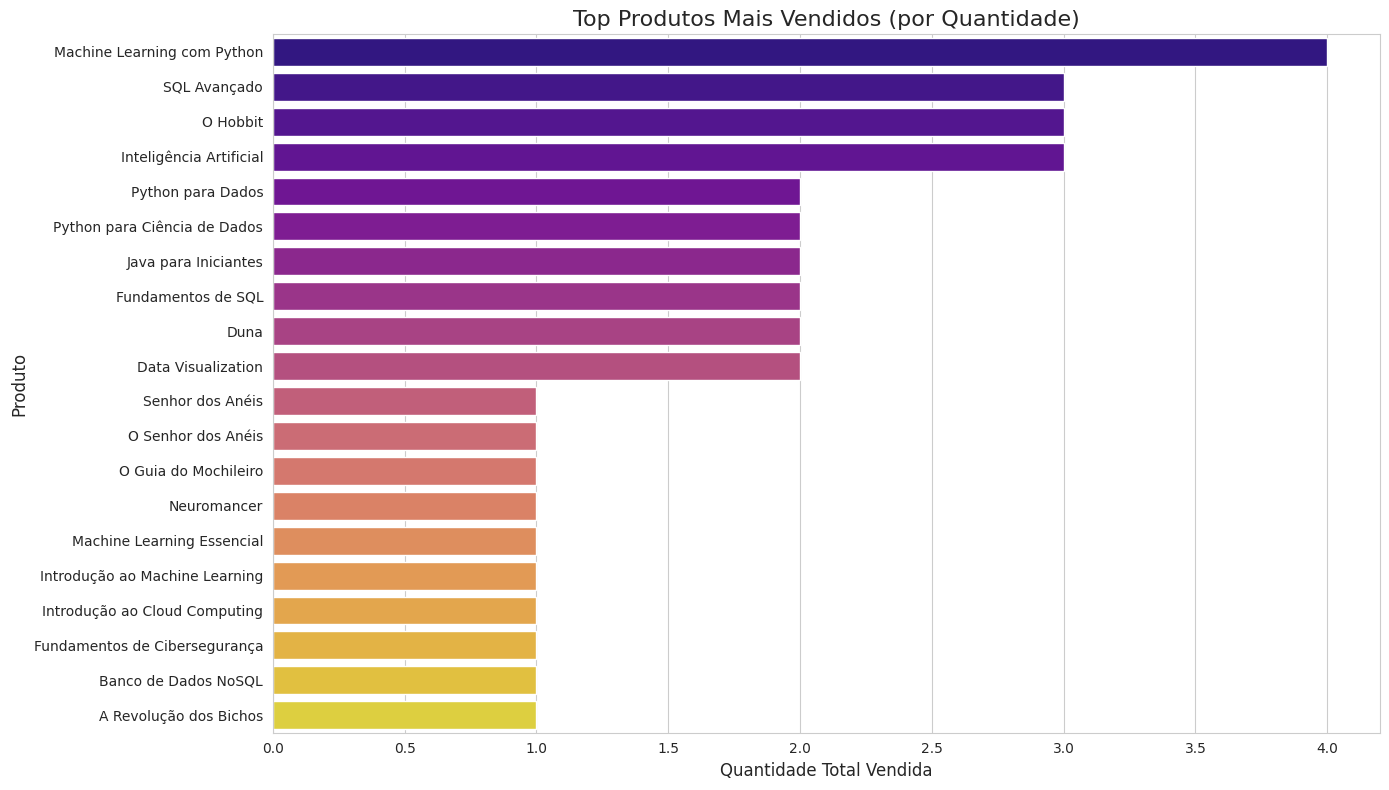

In [99]:

df_mais_vendidos['total_quantidade_vendida'] = df_mais_vendidos['total_quantidade_vendida']

# Gráfico
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_mais_vendidos,
    x='total_quantidade_vendida',
    y='nome_produto',
    hue='nome_produto',
    palette='plasma',
    legend=False
)
plt.title('Top Produtos Mais Vendidos (por Quantidade)', fontsize=16)
plt.xlabel('Quantidade Total Vendida', fontsize=12)
plt.ylabel('Produto', fontsize=12)
plt.tight_layout()
plt.show()


## Gráfico 4: Top Faturamento por categoria

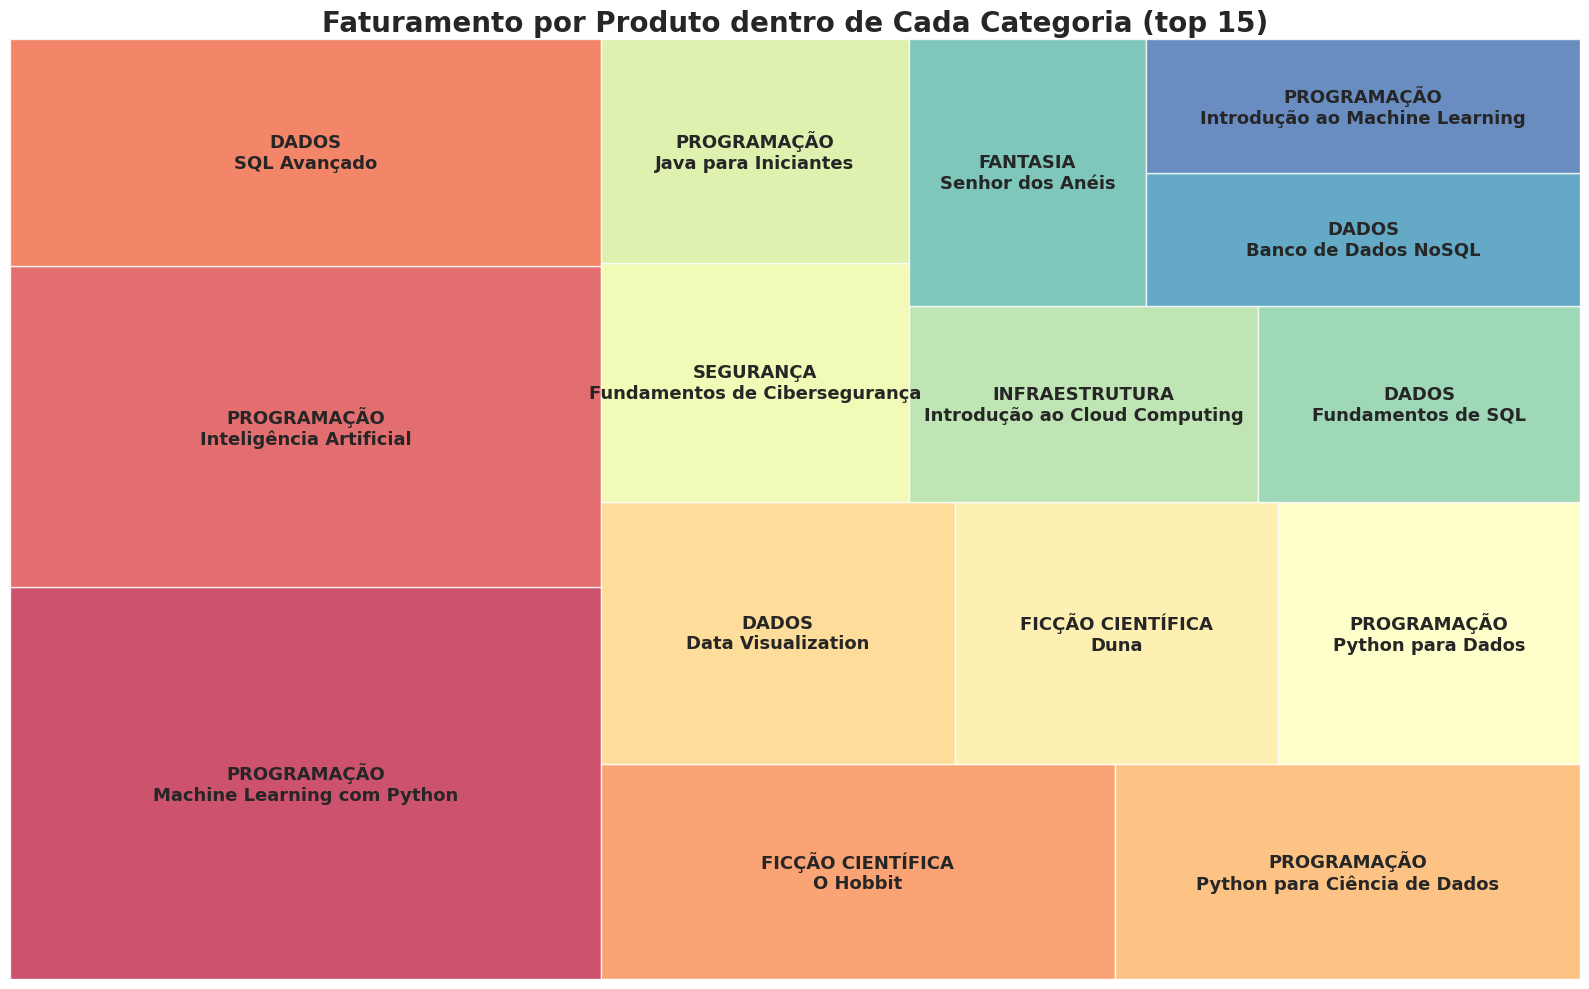

In [128]:
import squarify as sq

# Executa a query
df_faturamento_produto = executar_query(query_faturamento_produto)
df_faturamento_produto['faturamento'] = df_faturamento_produto['faturamento'].astype(float)

# Cria rótulos com categoria em destaque (maiúscula) + nome do produto
df_faturamento_produto['label'] = (
    df_faturamento_produto['categoria_produto'].str.upper() + '\n' + df_faturamento_produto['nome_produto']
)

# Limita aos top 15 produtos
df_top = df_faturamento_produto.head(15)

# Treemap
plt.figure(figsize=(16, 10))
sq.plot(
    sizes=df_top['faturamento'],
    label=df_top['label'],
    color=sns.color_palette('Spectral', len(df_top)),
    alpha=0.8,
    text_kwargs={'fontsize': 13, 'weight': 'bold'}
)
plt.title('Faturamento por Produto dentro de Cada Categoria (top 15)', fontsize=20, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


# Passo 6: Finalização

In [12]:
# Fechando a conexão com o banco de dados
conn.close()
print("✅ Análise concluída e conexão com o banco de dados fechada.")


✅ Análise concluída e conexão com o banco de dados fechada.


#PARA NOVAS CONSULTAS

> ⚠️ **ATENÇÃO:**  
> Após a célula de encerramento (`conn.close()`), o banco de dados em memória é destruído.  
> Para realizar **novas consultas**, é necessário **reabrir a conexão** e **executar novamente o script de criação e inserção de dados**.

In [117]:
# Reabrir conexão (se necessário)
conn = sqlite3.connect(':memory:')
# Reexecutar o script de criação e inserção de dados
cursor = conn.cursor()
cursor.executescript(script_sql_completo)
conn.commit()

from datetime import datetime
print(f"✅ Conexão estabelecida às {datetime.now().strftime('%H:%M:%S')}!")


✅ Conexão estabelecida às 00:48:01!
